In [36]:
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris(as_frame=True)

df = iris.data[["petal length (cm)", "petal width (cm)"]]
target = iris.target

X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=42)

softmax_regression = LogisticRegression(C=30, random_state=42)
softmax_regression.fit(X_train, y_train)


LogisticRegression(C=30, random_state=42)

Decision boudaties

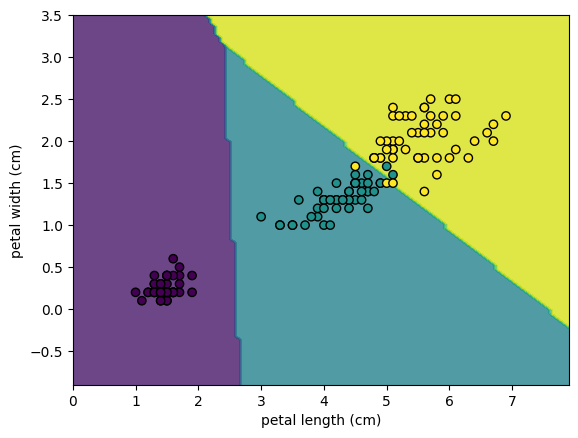

In [37]:

DecisionBoundaryDisplay.from_estimator(
    softmax_regression,
    df,
    response_method="predict",
    alpha=0.8,
)

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=target, edgecolor="k")

Decision probabilities

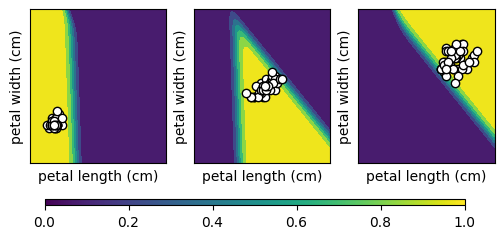

In [50]:

predicted = softmax_regression.predict(df)

fig, axes = plt.subplots(
    nrows=1, 
    ncols=len(iris.target_names),
    figsize=(3 * 2, 1 * 2)
)

for label in target.unique():
    disp = DecisionBoundaryDisplay.from_estimator(
        softmax_regression,
        df,
        response_method="predict_proba",
        class_of_interest=label,
        ax=axes[label],
        vmin=0,
        vmax=1,
    )

    mask_y_pred = predicted == label
    axes[label].scatter(
        df.iloc[mask_y_pred, 0], df.iloc[mask_y_pred, 1], marker="o", c="w", edgecolor="k"
    )

    axes[label].set(xticks=(), yticks=())

ax = plt.axes([0.15, -0.1, 0.7, 0.03])
_ = plt.colorbar(
    cm.ScalarMappable(norm=None, cmap="viridis"), cax=ax, orientation="horizontal"
)
